In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

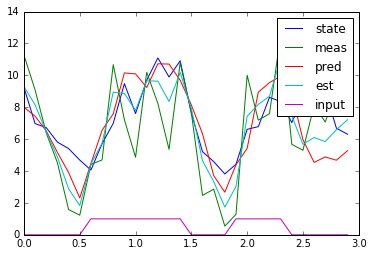

In [2]:
dt = 0.1

# prior
mu = 10
S = 1

# Motion model
A = 0.8
B = 3
R = 2 # How sure we are of our motion model

# Measurement model
C = 1 # Completely observable
Q = 4 # How sure we are of our measurement 

Tf = 3
T = [i for i in np.arange(0, Tf, dt)]
x = np.zeros(len(T) + 1)
y = np.zeros(len(T))
u = np.zeros(len(T))
mup_S = np.zeros(len(T))
mu_S = np.zeros(len(T))

# set initial state of x

x[0] = mu + np.random.normal(0, np.sqrt(S))

for i in xrange(len(T)):
    if (i > 1):
        u[i] = u[i-1]
    if mu > 10:
        u[i] = 0
    elif mu < 2:
        u[i] = 1
    
    e = np.random.normal(0, np.sqrt(R))
    
    # Actual state
    x[i + 1] = A * x[i] + B * u[i] + e
    
    d = np.random.normal(0, np.sqrt(Q))
    y[i] = C*x[i + 1] + d
    
    # Kalman stuff
    
    mu_old = mu
    S_old = S
    
    # priors from motion model
    mup = A * mu_old + B * u[i]
    Sp = A * S_old * A + R
    
    K = Sp * C * 1 / (C * Sp * C + Q)
    mu = mup + K * (y[i] - C * mup)
    S = (1 - K*C) * Sp
    
    mup_S[i] = mup
    mu_S[i] = mu
    
lines = plt.plot(T, x[1:], T, y, T, mup_S, T, mu_S, T, u)
plt.legend(lines, ['state', 'meas', 'pred', 'est', 'input'])

In [36]:
np.random.normal(0, np.sqrt(S))

1.4651494298233212